In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data =pd.read_csv('./csv/pcr_positive_daily.csv')

In [3]:
data.columns = ['Date','Infected']
data['Date'] = pd.to_datetime(data['Date'])
data =data.set_index('Date')
data = data.fillna(0)
data = data.iloc[:-1,:]

# 11/6 以降のIndexを拡張する

In [4]:
sub_date = pd.date_range(start='2020-11-06', periods=56,  freq='D')
sub_date = pd.DataFrame(sub_date)
sub_date['Infected'] = 0
sub_date = sub_date.set_index(0)
data = pd.concat([data,sub_date])

In [5]:
'''data =pd.read_csv('./csv/data20201101.csv')
data['Date'] = pd.to_datetime(data['Date'])
data_ttl = data[['Date','Infected']]
data_ttl = data_ttl.set_index('Date')
data_ttl.fillna(0,inplace=True)
'''

# 28日前までデータで次の1日を予測。その予測を28回するので56日前までのデータをTestに
# 56日+拡張した56日＝112日。
lag = 3 #提出データが11/9から。実際は11/5までの結果があるのでずらす日数

data_infected = data[:-112 +lag]
data_for_predict = data[-112+lag:]

In [6]:
data_infected
data_for_predict

,Infected
2020-09-14,265.0
2020-09-15,531.0
2020-09-16,543.0
2020-09-17,480.0
2020-09-18,569.0
2020-09-19,597.0
2020-09-20,469.0
2020-09-21,307.0
2020-09-22,322.0
2020-09-23,216.0


In [7]:
tmp = data_for_predict.values
X_test = []
pred_date =[] #値が入っている最後の日まで= test期間 + lag

for i in range(28):
    X_test.append(tmp[i:i+28])
    pred_date.append(data_for_predict[i +28: i + 28+1 ].index.strftime('%Y%m%d'))

In [8]:
pred_date

[Index(['20201012'], dtype='object'),
 Index(['20201013'], dtype='object'),
 Index(['20201014'], dtype='object'),
 Index(['20201015'], dtype='object'),
 Index(['20201016'], dtype='object'),
 Index(['20201017'], dtype='object'),
 Index(['20201018'], dtype='object'),
 Index(['20201019'], dtype='object'),
 Index(['20201020'], dtype='object'),
 Index(['20201021'], dtype='object'),
 Index(['20201022'], dtype='object'),
 Index(['20201023'], dtype='object'),
 Index(['20201024'], dtype='object'),
 Index(['20201025'], dtype='object'),
 Index(['20201026'], dtype='object'),
 Index(['20201027'], dtype='object'),
 Index(['20201028'], dtype='object'),
 Index(['20201029'], dtype='object'),
 Index(['20201030'], dtype='object'),
 Index(['20201031'], dtype='object'),
 Index(['20201101'], dtype='object'),
 Index(['20201102'], dtype='object'),
 Index(['20201103'], dtype='object'),
 Index(['20201104'], dtype='object'),
 Index(['20201105'], dtype='object'),
 Index(['20201106'], dtype='object'),
 Index(['202

In [9]:
length_per_unit = 28
dimension = len(data_infected)

# DataFrame→array変換
data_array = data_infected.as_matrix()
# 時系列データを入れる箱
sequences = []
# 正解データを入れる箱
target = []
# 正解データの日付を入れる箱
target_date = []

# 一グループごとに時系列データと正解データをセットしていく
for i in range(0, data_array.shape[0] - length_per_unit-lag):
    sequences.append(data_array[i+lag :i + length_per_unit+lag])
    target.append(data_array[i + length_per_unit + lag])
    target_date.append(data_infected[i + length_per_unit + lag : i + length_per_unit+1+lag ].index.strftime('%Y%m%d'))

C:\Users\kmtk49\Anaconda3\envs\SIGNATE\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [10]:
print(len(sequences),len(target),len(target_date))

211 211 211


In [11]:
target

[array([6.]),
 array([7.]),
 array([7.]),
 array([10.]),
 array([9.]),
 array([11.]),
 array([27.]),
 array([12.]),
 array([12.]),
 array([8.]),
 array([22.]),
 array([24.]),
 array([20.]),
 array([9.]),
 array([15.]),
 array([14.]),
 array([16.]),
 array([33.]),
 array([31.]),
 array([59.]),
 array([47.]),
 array([33.]),
 array([26.]),
 array([54.]),
 array([52.]),
 array([55.]),
 array([40.]),
 array([62.]),
 array([33.]),
 array([15.]),
 array([44.]),
 array([39.]),
 array([36.]),
 array([53.]),
 array([34.]),
 array([42.]),
 array([38.]),
 array([65.]),
 array([93.]),
 array([96.]),
 array([104.]),
 array([194.]),
 array([185.]),
 array([74.]),
 array([218.]),
 array([224.]),
 array([253.]),
 array([337.]),
 array([370.]),
 array([386.]),
 array([270.]),
 array([377.]),
 array([550.]),
 array([572.]),
 array([708.]),
 array([676.]),
 array([571.]),
 array([333.]),
 array([511.]),
 array([511.]),
 array([596.]),
 array([575.]),
 array([590.]),
 array([372.]),
 array([365.]),
 array(

In [12]:
target_date

[Index(['20200216'], dtype='object'),
 Index(['20200217'], dtype='object'),
 Index(['20200218'], dtype='object'),
 Index(['20200219'], dtype='object'),
 Index(['20200220'], dtype='object'),
 Index(['20200221'], dtype='object'),
 Index(['20200222'], dtype='object'),
 Index(['20200223'], dtype='object'),
 Index(['20200224'], dtype='object'),
 Index(['20200225'], dtype='object'),
 Index(['20200226'], dtype='object'),
 Index(['20200227'], dtype='object'),
 Index(['20200228'], dtype='object'),
 Index(['20200229'], dtype='object'),
 Index(['20200301'], dtype='object'),
 Index(['20200302'], dtype='object'),
 Index(['20200303'], dtype='object'),
 Index(['20200304'], dtype='object'),
 Index(['20200305'], dtype='object'),
 Index(['20200306'], dtype='object'),
 Index(['20200307'], dtype='object'),
 Index(['20200308'], dtype='object'),
 Index(['20200309'], dtype='object'),
 Index(['20200310'], dtype='object'),
 Index(['20200311'], dtype='object'),
 Index(['20200312'], dtype='object'),
 Index(['202

In [13]:
#X_test = X_test.values
X_test = np.array(X_test).reshape(28, 28, 1)
X_test

array([[[ 265.],
        [ 531.],
        [ 543.],
        [ 480.],
        [ 569.],
        [ 597.],
        [ 469.],
        [ 307.],
        [ 322.],
        [ 216.],
        [ 477.],
        [ 570.],
        [ 638.],
        [ 478.],
        [ 294.],
        [ 531.],
        [ 570.],
        [ 623.],
        [ 537.],
        [ 564.],
        [ 395.],
        [ 271.],
        [ 497.],
        [ 505.],
        [ 622.],
        [ 594.],
        [ 669.],
        [ 432.]],

       [[ 531.],
        [ 543.],
        [ 480.],
        [ 569.],
        [ 597.],
        [ 469.],
        [ 307.],
        [ 322.],
        [ 216.],
        [ 477.],
        [ 570.],
        [ 638.],
        [ 478.],
        [ 294.],
        [ 531.],
        [ 570.],
        [ 623.],
        [ 537.],
        [ 564.],
        [ 395.],
        [ 271.],
        [ 497.],
        [ 505.],
        [ 622.],
        [ 594.],
        [ 669.],
        [ 432.],
        [ 273.]],

       [[ 543.],
        [ 480.],
        [ 

# LSTM
https://qiita.com/nvtomo1029/items/689c0a19880d1dc41d43

In [14]:
6692/239

28.0

In [15]:
# 時系列データを成形
X_train = np.array(sequences).reshape(len(sequences), length_per_unit, 1)
# 正解データを成形
y_train = np.array(target).reshape(len(sequences), 1)
# 正解データの日付データを成形
y_train_date = np.array(target_date).reshape(len(sequences), 1)

In [16]:
import tensorflow as tf

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
'''
https://www.kaggle.com/dimitreoliveira/time-series-forecasting-with-lstm-autoencoders
Regular LSTM
'''
lr = 0.01 # lr　に少し大きめの値を設定しておく (デフォルトは lr =0.001)
epochs = 1024
batch_size = 2048 #4096
adam = optimizers.Adam(lr)

model_lstm = Sequential()
model_lstm.add(LSTM(64, input_shape=(28,1)))
model_lstm.add(Dropout(0.4))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mse',
                   optimizer=adam, 
                   metrics=['mean_squared_error'])
model_lstm.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [18]:
%time
early_stopping = EarlyStopping(
                        monitor='val_loss',
                        min_delta=0.0,
                        patience=10,
                )

# val_lossの改善が2エポック見られなかったら、学習率を0.5倍する。
reduce_lr = ReduceLROnPlateau(
                        monitor='val_loss',
                        factor=0.5,
                        patience=2,
                        min_lr=0.0001
                )

history = model_lstm.fit(X_train,y_train,
               epochs = epochs,
               batch_size =batch_size)

Wall time: 0 ns
Instructions for updating:
Use tf.cast instead.
Epoch 1/1024
211/211 [==============================] - 2s 8ms/sample - loss: 286079.4062 - mean_squared_error: 286079.4062
Epoch 2/1024
211/211 [==============================] - 0s 194us/sample - loss: 285758.4062 - mean_squared_error: 285758.4062
Epoch 3/1024
211/211 [==============================] - 0s 185us/sample - loss: 285306.1562 - mean_squared_error: 285306.1562
Epoch 4/1024
211/211 [==============================] - 0s 190us/sample - loss: 284991.8438 - mean_squared_error: 284991.8438
Epoch 5/1024
211/211 [==============================] - 0s 194us/sample - loss: 284704.2500 - mean_squared_error: 284704.2500
Epoch 6/1024
211/211 [==============================] - 0s 199us/sample - loss: 284224.3438 - mean_squared_error: 284224.3438
Epoch 7/1024
211/211 [==============================] - 0s 180us/sample - loss: 283667.7500 - mean_squared_error: 283667.7500
Epoch 8/1024
211/211 [==============================] - 

Epoch 64/1024
211/211 [==============================] - 0s 194us/sample - loss: 262700.9062 - mean_squared_error: 262700.9062
Epoch 65/1024
211/211 [==============================] - 0s 180us/sample - loss: 263194.9375 - mean_squared_error: 263194.9375
Epoch 66/1024
211/211 [==============================] - 0s 175us/sample - loss: 261681.9688 - mean_squared_error: 261681.9688
Epoch 67/1024
211/211 [==============================] - 0s 171us/sample - loss: 262127.1094 - mean_squared_error: 262127.1094
Epoch 68/1024
211/211 [==============================] - 0s 171us/sample - loss: 261034.5938 - mean_squared_error: 261034.5938
Epoch 69/1024
211/211 [==============================] - 0s 166us/sample - loss: 261273.9688 - mean_squared_error: 261273.9688
Epoch 70/1024
211/211 [==============================] - 0s 171us/sample - loss: 260580.7188 - mean_squared_error: 260580.7188
Epoch 71/1024
211/211 [==============================] - 0s 265us/sample - loss: 260616.1094 - mean_squared_err

Epoch 129/1024
211/211 [==============================] - 0s 194us/sample - loss: 244645.5000 - mean_squared_error: 244645.5000
Epoch 130/1024
211/211 [==============================] - 0s 199us/sample - loss: 243807.8125 - mean_squared_error: 243807.8125
Epoch 131/1024
211/211 [==============================] - 0s 180us/sample - loss: 242699.5000 - mean_squared_error: 242699.5000
Epoch 132/1024
211/211 [==============================] - 0s 180us/sample - loss: 242835.5625 - mean_squared_error: 242835.5625
Epoch 133/1024
211/211 [==============================] - 0s 171us/sample - loss: 242118.7344 - mean_squared_error: 242118.7344
Epoch 134/1024
211/211 [==============================] - 0s 166us/sample - loss: 243037.6094 - mean_squared_error: 243037.6094
Epoch 135/1024
211/211 [==============================] - 0s 166us/sample - loss: 241881.8906 - mean_squared_error: 241881.8906
Epoch 136/1024
211/211 [==============================] - 0s 156us/sample - loss: 242623.2031 - mean_squ

211/211 [==============================] - 0s 175us/sample - loss: 227425.9531 - mean_squared_error: 227425.9531
Epoch 194/1024
211/211 [==============================] - 0s 223us/sample - loss: 227832.0312 - mean_squared_error: 227832.0312
Epoch 195/1024
211/211 [==============================] - 0s 185us/sample - loss: 227302.9219 - mean_squared_error: 227302.9219
Epoch 196/1024
211/211 [==============================] - 0s 194us/sample - loss: 227632.1719 - mean_squared_error: 227632.1719
Epoch 197/1024
211/211 [==============================] - 0s 175us/sample - loss: 226814.6406 - mean_squared_error: 226814.6406
Epoch 198/1024
211/211 [==============================] - 0s 171us/sample - loss: 227233.3438 - mean_squared_error: 227233.3438
Epoch 199/1024
211/211 [==============================] - 0s 180us/sample - loss: 226588.2344 - mean_squared_error: 226588.2344
Epoch 200/1024
211/211 [==============================] - 0s 180us/sample - loss: 226853.7812 - mean_squared_error: 226

Epoch 258/1024
211/211 [==============================] - 0s 199us/sample - loss: 215153.3281 - mean_squared_error: 215153.3281
Epoch 259/1024
211/211 [==============================] - 0s 190us/sample - loss: 215426.7812 - mean_squared_error: 215426.7812
Epoch 260/1024
211/211 [==============================] - 0s 204us/sample - loss: 214971.3438 - mean_squared_error: 214971.3438
Epoch 261/1024
211/211 [==============================] - 0s 265us/sample - loss: 214046.8594 - mean_squared_error: 214046.8594
Epoch 262/1024
211/211 [==============================] - 0s 218us/sample - loss: 217723.7969 - mean_squared_error: 217723.7969
Epoch 263/1024
211/211 [==============================] - 0s 185us/sample - loss: 214810.3438 - mean_squared_error: 214810.3438
Epoch 264/1024
211/211 [==============================] - 0s 175us/sample - loss: 213852.6562 - mean_squared_error: 213852.6562
Epoch 265/1024
211/211 [==============================] - 0s 175us/sample - loss: 212392.6406 - mean_squ

211/211 [==============================] - 0s 185us/sample - loss: 204500.5156 - mean_squared_error: 204500.5156
Epoch 323/1024
211/211 [==============================] - 0s 175us/sample - loss: 203460.5938 - mean_squared_error: 203460.5938
Epoch 324/1024
211/211 [==============================] - 0s 180us/sample - loss: 202919.8438 - mean_squared_error: 202919.8438
Epoch 325/1024
211/211 [==============================] - 0s 175us/sample - loss: 203411.9844 - mean_squared_error: 203411.9844
Epoch 326/1024
211/211 [==============================] - 0s 166us/sample - loss: 203983.1406 - mean_squared_error: 203983.1406
Epoch 327/1024
211/211 [==============================] - 0s 175us/sample - loss: 203459.4844 - mean_squared_error: 203459.4844
Epoch 328/1024
211/211 [==============================] - 0s 166us/sample - loss: 202709.8750 - mean_squared_error: 202709.8750
Epoch 329/1024
211/211 [==============================] - 0s 171us/sample - loss: 203821.5156 - mean_squared_error: 203

Epoch 387/1024
211/211 [==============================] - 0s 166us/sample - loss: 192046.3906 - mean_squared_error: 192046.3906
Epoch 388/1024
211/211 [==============================] - 0s 185us/sample - loss: 195204.8906 - mean_squared_error: 195204.8906
Epoch 389/1024
211/211 [==============================] - 0s 156us/sample - loss: 192117.0469 - mean_squared_error: 192117.0469
Epoch 390/1024
211/211 [==============================] - 0s 156us/sample - loss: 193220.6562 - mean_squared_error: 193220.6562
Epoch 391/1024
211/211 [==============================] - 0s 152us/sample - loss: 193773.6562 - mean_squared_error: 193773.6562
Epoch 392/1024
211/211 [==============================] - 0s 161us/sample - loss: 195070.1406 - mean_squared_error: 195070.1406
Epoch 393/1024
211/211 [==============================] - 0s 185us/sample - loss: 194089.3906 - mean_squared_error: 194089.3906
Epoch 394/1024
211/211 [==============================] - 0s 166us/sample - loss: 193951.3594 - mean_squ

Epoch 452/1024
211/211 [==============================] - 0s 166us/sample - loss: 184885.0938 - mean_squared_error: 184885.0938
Epoch 453/1024
211/211 [==============================] - 0s 175us/sample - loss: 189093.7031 - mean_squared_error: 189093.7031
Epoch 454/1024
211/211 [==============================] - 0s 166us/sample - loss: 187286.1406 - mean_squared_error: 187286.1406
Epoch 455/1024
211/211 [==============================] - 0s 175us/sample - loss: 184965.4062 - mean_squared_error: 184965.4062
Epoch 456/1024
211/211 [==============================] - 0s 166us/sample - loss: 184143.7500 - mean_squared_error: 184143.7500
Epoch 457/1024
211/211 [==============================] - 0s 171us/sample - loss: 185631.2812 - mean_squared_error: 185631.2812
Epoch 458/1024
211/211 [==============================] - 0s 170us/sample - loss: 187001.5312 - mean_squared_error: 187001.5312
Epoch 459/1024
211/211 [==============================] - 0s 171us/sample - loss: 186618.2188 - mean_squ

211/211 [==============================] - 0s 156us/sample - loss: 180361.0781 - mean_squared_error: 180361.0781
Epoch 517/1024
211/211 [==============================] - 0s 166us/sample - loss: 179833.7812 - mean_squared_error: 179833.7812
Epoch 518/1024
211/211 [==============================] - 0s 161us/sample - loss: 179493.7188 - mean_squared_error: 179493.7188
Epoch 519/1024
211/211 [==============================] - 0s 161us/sample - loss: 178455.4375 - mean_squared_error: 178455.4375
Epoch 520/1024
211/211 [==============================] - 0s 166us/sample - loss: 178087.6719 - mean_squared_error: 178087.6719
Epoch 521/1024
211/211 [==============================] - 0s 166us/sample - loss: 181751.4531 - mean_squared_error: 181751.4531
Epoch 522/1024
211/211 [==============================] - 0s 166us/sample - loss: 180613.3906 - mean_squared_error: 180613.3906
Epoch 523/1024
211/211 [==============================] - 0s 171us/sample - loss: 177346.5156 - mean_squared_error: 177

Epoch 581/1024
211/211 [==============================] - 0s 171us/sample - loss: 172677.3125 - mean_squared_error: 172677.3125
Epoch 582/1024
211/211 [==============================] - 0s 175us/sample - loss: 173609.7656 - mean_squared_error: 173609.7656
Epoch 583/1024
211/211 [==============================] - 0s 161us/sample - loss: 173861.8594 - mean_squared_error: 173861.8594
Epoch 584/1024
211/211 [==============================] - 0s 171us/sample - loss: 173809.4844 - mean_squared_error: 173809.4844
Epoch 585/1024
211/211 [==============================] - 0s 166us/sample - loss: 173679.4375 - mean_squared_error: 173679.4375
Epoch 586/1024
211/211 [==============================] - 0s 175us/sample - loss: 177668.7031 - mean_squared_error: 177668.7031
Epoch 587/1024
211/211 [==============================] - 0s 171us/sample - loss: 173777.5000 - mean_squared_error: 173777.5000
Epoch 588/1024
211/211 [==============================] - 0s 171us/sample - loss: 175010.8281 - mean_squ

211/211 [==============================] - 0s 161us/sample - loss: 172866.1250 - mean_squared_error: 172866.1250
Epoch 646/1024
211/211 [==============================] - 0s 161us/sample - loss: 169711.9688 - mean_squared_error: 169711.9688
Epoch 647/1024
211/211 [==============================] - 0s 166us/sample - loss: 171033.1250 - mean_squared_error: 171033.1250
Epoch 648/1024
211/211 [==============================] - 0s 166us/sample - loss: 170762.7812 - mean_squared_error: 170762.7812
Epoch 649/1024
211/211 [==============================] - 0s 166us/sample - loss: 171345.1719 - mean_squared_error: 171345.1719
Epoch 650/1024
211/211 [==============================] - 0s 171us/sample - loss: 170951.2812 - mean_squared_error: 170951.2812
Epoch 651/1024
211/211 [==============================] - 0s 161us/sample - loss: 172774.7812 - mean_squared_error: 172774.7812
Epoch 652/1024
211/211 [==============================] - 0s 170us/sample - loss: 166331.8281 - mean_squared_error: 166

Epoch 710/1024
211/211 [==============================] - 0s 256us/sample - loss: 167337.3281 - mean_squared_error: 167337.3281
Epoch 711/1024
211/211 [==============================] - 0s 223us/sample - loss: 170904.3906 - mean_squared_error: 170904.3906
Epoch 712/1024
211/211 [==============================] - 0s 180us/sample - loss: 170329.1562 - mean_squared_error: 170329.1562
Epoch 713/1024
211/211 [==============================] - 0s 171us/sample - loss: 170280.6406 - mean_squared_error: 170280.6406
Epoch 714/1024
211/211 [==============================] - 0s 171us/sample - loss: 168313.3438 - mean_squared_error: 168313.3438
Epoch 715/1024
211/211 [==============================] - 0s 256us/sample - loss: 167417.7188 - mean_squared_error: 167417.7188
Epoch 716/1024
211/211 [==============================] - 0s 171us/sample - loss: 165302.5469 - mean_squared_error: 165302.5469
Epoch 717/1024
211/211 [==============================] - 0s 171us/sample - loss: 168544.0000 - mean_squ

211/211 [==============================] - 0s 171us/sample - loss: 163059.4531 - mean_squared_error: 163059.4531
Epoch 775/1024
211/211 [==============================] - 0s 190us/sample - loss: 165611.0312 - mean_squared_error: 165611.0312
Epoch 776/1024
211/211 [==============================] - 0s 171us/sample - loss: 160142.2344 - mean_squared_error: 160142.2344
Epoch 777/1024
211/211 [==============================] - 0s 171us/sample - loss: 166411.8750 - mean_squared_error: 166411.8750
Epoch 778/1024
211/211 [==============================] - 0s 171us/sample - loss: 165304.0156 - mean_squared_error: 165304.0156
Epoch 779/1024
211/211 [==============================] - 0s 190us/sample - loss: 165652.9688 - mean_squared_error: 165652.9688
Epoch 780/1024
211/211 [==============================] - 0s 166us/sample - loss: 164915.4531 - mean_squared_error: 164915.4531
Epoch 781/1024
211/211 [==============================] - 0s 171us/sample - loss: 166041.0469 - mean_squared_error: 166

Epoch 839/1024
211/211 [==============================] - 0s 185us/sample - loss: 163815.0312 - mean_squared_error: 163815.0312
Epoch 840/1024
211/211 [==============================] - 0s 175us/sample - loss: 162168.8281 - mean_squared_error: 162168.8281
Epoch 841/1024
211/211 [==============================] - 0s 175us/sample - loss: 161546.6875 - mean_squared_error: 161546.6875
Epoch 842/1024
211/211 [==============================] - 0s 166us/sample - loss: 161337.4375 - mean_squared_error: 161337.4375
Epoch 843/1024
211/211 [==============================] - 0s 156us/sample - loss: 163406.8281 - mean_squared_error: 163406.8281
Epoch 844/1024
211/211 [==============================] - 0s 156us/sample - loss: 162362.5938 - mean_squared_error: 162362.5938
Epoch 845/1024
211/211 [==============================] - 0s 156us/sample - loss: 160169.3906 - mean_squared_error: 160169.3906
Epoch 846/1024
211/211 [==============================] - 0s 171us/sample - loss: 160838.8750 - mean_squ

Epoch 904/1024
211/211 [==============================] - 0s 180us/sample - loss: 160547.5469 - mean_squared_error: 160547.5469
Epoch 905/1024
211/211 [==============================] - 0s 166us/sample - loss: 161215.2812 - mean_squared_error: 161215.2812
Epoch 906/1024
211/211 [==============================] - 0s 180us/sample - loss: 161374.7656 - mean_squared_error: 161374.7656
Epoch 907/1024
211/211 [==============================] - 0s 166us/sample - loss: 161953.1406 - mean_squared_error: 161953.1406
Epoch 908/1024
211/211 [==============================] - 0s 175us/sample - loss: 158993.5781 - mean_squared_error: 158993.5781
Epoch 909/1024
211/211 [==============================] - 0s 161us/sample - loss: 164035.9844 - mean_squared_error: 164035.9844
Epoch 910/1024
211/211 [==============================] - 0s 171us/sample - loss: 160656.3750 - mean_squared_error: 160656.3750
Epoch 911/1024
211/211 [==============================] - 0s 161us/sample - loss: 162431.9219 - mean_squ

Epoch 969/1024
211/211 [==============================] - 0s 166us/sample - loss: 158631.8438 - mean_squared_error: 158631.8438
Epoch 970/1024
211/211 [==============================] - 0s 166us/sample - loss: 160359.7031 - mean_squared_error: 160359.7031
Epoch 971/1024
211/211 [==============================] - 0s 166us/sample - loss: 163432.0312 - mean_squared_error: 163432.0312
Epoch 972/1024
211/211 [==============================] - 0s 161us/sample - loss: 160467.9375 - mean_squared_error: 160467.9375
Epoch 973/1024
211/211 [==============================] - 0s 171us/sample - loss: 161391.1719 - mean_squared_error: 161391.1719
Epoch 974/1024
211/211 [==============================] - 0s 171us/sample - loss: 158764.6250 - mean_squared_error: 158764.6250
Epoch 975/1024
211/211 [==============================] - 0s 161us/sample - loss: 160632.1719 - mean_squared_error: 160632.1719
Epoch 976/1024
211/211 [==============================] - 0s 166us/sample - loss: 159529.7812 - mean_squ

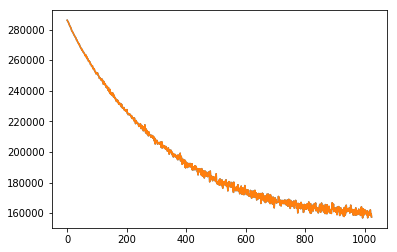

In [19]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['loss'])

In [20]:
pred = model_lstm.predict(X_test)

In [21]:
pred =pd.DataFrame(pred)

In [40]:
pred1 = pd.read_csv('./sub/submission_lstm01.csv',names=['id','res'])
pred1 = pred1['res']
pred3 = pred1.shift(3)

In [46]:
pred3.iat[0] = 450
pred3.iat[1] = 580
pred3.iat[2] = 660

In [49]:
pred3

0     450.00000
1     580.00000
2     660.00000
3     732.33990
4     691.57550
5     739.44980
6     590.58720
7     448.21838
8     582.90106
9     660.90300
10    745.56570
11    719.63306
12    661.26654
13    594.90424
14    485.31287
15    576.04535
16    716.28750
17    707.00160
18    754.97034
19    740.99220
20    610.64410
21    558.83100
22    722.84950
23    748.55530
24    762.42004
25    756.38184
26    762.42334
27    688.08780
Name: res, dtype: float64

In [47]:
sub_date = pd.date_range(start='2020-10-05', periods=28,  freq='D')
sub_date = pd.DataFrame(sub_date)
sub_date['Infected'] = pred3
sub_date = sub_date.set_index(0)
sub_date

,Infected
0,
2020-10-05,450.00000
2020-10-06,580.00000
2020-10-07,660.00000
2020-10-08,732.33990
2020-10-09,691.57550
2020-10-10,739.44980
2020-10-11,590.58720
2020-10-12,448.21838
2020-10-13,582.90106


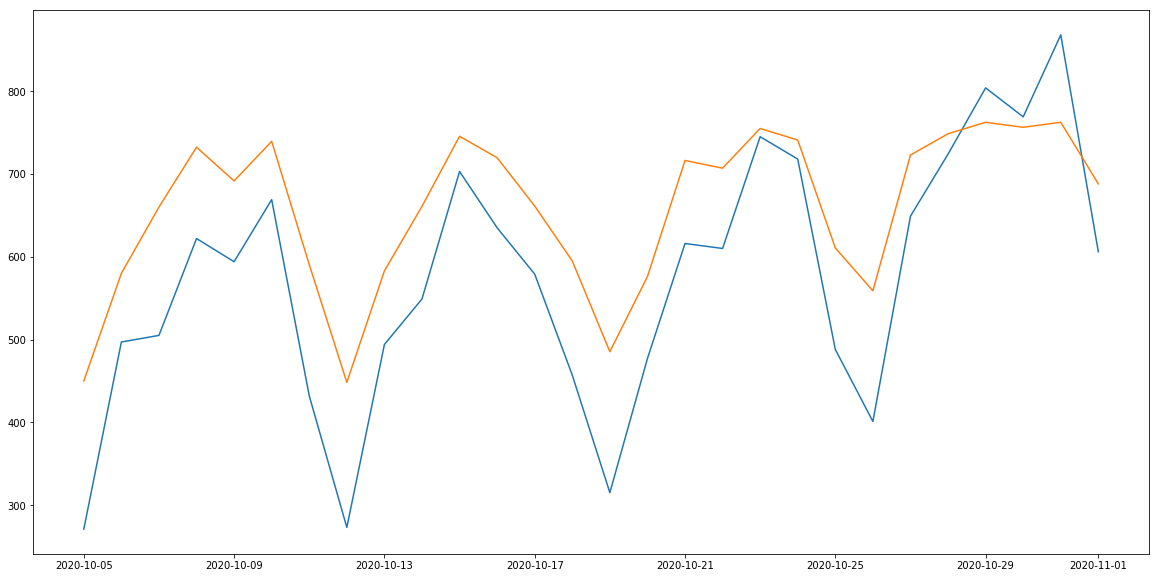

In [48]:
plt.subplots(figsize=(20,10))
plt.plot(data.loc['2020-10-5':'2020-11-01'])
plt.plot(sub_date)

In [52]:
pred3.index = np.arange(1, len(pred3)+1)
pred3.to_csv('./sub/submission_lstm01_final.csv',header=False)
pred3

1     450.00000
2     580.00000
3     660.00000
4     732.33990
5     691.57550
6     739.44980
7     590.58720
8     448.21838
9     582.90106
10    660.90300
11    745.56570
12    719.63306
13    661.26654
14    594.90424
15    485.31287
16    576.04535
17    716.28750
18    707.00160
19    754.97034
20    740.99220
21    610.64410
22    558.83100
23    722.84950
24    748.55530
25    762.42004
26    756.38184
27    762.42334
28    688.08780
Name: res, dtype: float64